# Introduction to Feature Engineering and Data preparation
* In the real world, not every data set is machine learning ready, we often need to perform data cleaning or try to produce more usable features
* In this section, we'll work on the large linear regression data set to get it ready for machine learning project
* What is feature engineering?
    * Is the process of using domain knowledge to extract features from raw data via data mining techniques
    * But what does this actually entail?
* Three general approaches:
    * Extracting Information
        * Imagine a data set with visitor exprenditure information for a bar
        * We have a timestamp for each row:
            * 1990-12-01 09:26:03 (full timestamp)
        * In its current format, its very difficult to pass into a machine learning algorithm
        * There is no coefficient we can apply for a non-numeric data point:
            * 1990-12-01 09:26:03
        * In general for most algorithms we need to make sure features are float or int
        * Instead we extract information
            * 1990-12-01 09:26:03
                * Year: 1990
                * Month: 12
                * Weakday or Weakend (0/1)
                * Mon:1, Tues: 2,... Sun:7
        * More complex example:
            * Text data for deed of house
                * Length of text
                * Number of times certain terms are mentioned
    * Combining information
        * We have actually already done this with Polynomial Regression
        * Recall advertising spend could have possible interaction terms to consider, so we could multiply them together
        * Could also combine extracted information
            * New feature:
                * 0 or 1 value indicating:
                    * Both weekend and evening
    * Transforming information
        * Very common for string data
        * Most algorithms can not accept string data (can't multiple a string such as "red" by a numeric coefficient
        * Often categorical data is presented as string data
        * For example a large data set of social network users could have country of origin as a string feature (e.g USA, UK, MEX, etc.)
            * We can use two approaches here:
                * Integer Encoding
                    * Directly convert categories into integers 1,2,3,...N
                    * USA => 1, MEX => 2, CAN => 3 etc.
                    * Limitation : Possible issue is implied ordering and relationship (ordinal variable)
                        * Here we see the implication MEX is twice the value of USA
                        * Here we see the implication CAN is three the value of USA
                        * This may or may not make sense depending on the feature and domain
                            * Spice level (make sense): mild = 1, <= hot = 2, <=fire = 3
                    * Always carefully consider the implication of integer encoding
                    * Pros:
                        * Very easy to do and understand
                        * Does not increase number of features
                    * Cons:
                        * Implies ordered relationship between categories
                * One-hot encoding (Dummy Variables)
                    * Convert categories into individual features that are either 0 or 1
                    * For example: Country: USA, MEX, CAN, USA
                        * Create columns for every single unique category possible
                        * if 0 is not this category, if 1 is this category
                        * No orderd relationship is implied between categories
                    * Limitation: We greatly expanded our feature set, many more columns
                    * We can try to reduce this feature column expansion by creating higher level categories
                        * For example, regions or continents instead of countries
                        * Using pandas .map() or .apply() can achieve this
                        * May require a lot of tuning and domain experience to choose reasonable higher level categories or mappings
                    * Also must be aware of "dummy variable trap" mathematically known as **multi-collinearity**
                    * Converting to dummy variables can cause features to be duplicated
                    * Let's consider the simplest possible example
                        * Consider a binary category (only two options): UP and DOWN
                        * The new columns are duplicate information with inverted encoding
                        * We know that if not UP so the value will be DOWN => why need to duplicate the information
                        * Easily fixed by simply dropping last column
                        * This can be extended to more than 2 categories
                    * Pros:
                        * No ordering implied
                    * Cons:
                        * Potential to create many more feature columns an coefficients
                        * Dummy variable trap consideration
                        * Not easy to add new categories
* Throughout this section of the course we'll work on addressing the following issues:
    * Outliers in Data
    * Missing data
    * Categorical data
* Not every issue here is strictly "feature engineering" but could also be called "data cleaning"
* Keep in mind feature engineering in general will always be data and domain dependent
* There is no one size fits all solution

# Dealing with Outliners
* Often a data set will have a few points that are extreme outliners
* It's often better to simply remove these few points from the data set in order to have a more generalized model
* Outlier Considerations
    * Definition of an Outlier
        * Range and Limits
            * We need to decide what will constitute an outlier with some methodology
                * InterQuartile Range (The IQR in box plots)
                    * Either you are 1.5 IQR  below the first quartile that is Q1 or 1.5 IQR above Q3 are you out liner
                * Standard Deviation
                    * Anything beyond 3 standard deviations of data set is going to be labeled an **outliner**
                * Visualized or Domain Limit value
        * Percentage of Data
            * Keep in mind if a large percentage of your data is being labeled as an outliner, then you actually just have a wide distribution, not outliers!
            * Limit outliers to a few percentage points a most
    * These are both very domain dependant
    * Utilize visualization plots to be able to see and identify outlier points
    * Keep in mind, this will create caveats for your future model (e.g Model not suitable for houses priced over 10 million)
    * Keep in mind, there is no 100% correct outlier methodology that will apply to every situation
    * Let's explore the Ames Data Set for outliers!
---
### Import environment

In [211]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### A function that allows you to create a random distribution of ages

In [214]:
def create_ages(mu=50, sigma=13, num_samples=100, seed=42):

    # Set a random seed in the same cell as the random call
    # We set seed to 42 (42 is an arbitrary choice from Histogram
    np.random.seed(seed)

    # Create the normal distribution
    sample_ages = np.random.normal(loc=mu, scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages, decimals=0)
    return sample_ages

In [212]:
mpl.rcParams.update({"figure.facecolor": "white",
                    "figure.figsize": [16,11]})

In [213]:
mpl.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.gri

### Create a sample of distribution of ages

In [215]:
sample = create_ages()

In [216]:
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

* We could not say that the above 70 and 20 lower points are the outliers
* Need more specific robust methodology

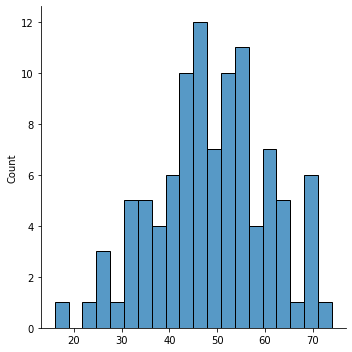

In [217]:
sns.displot(sample, bins=20)

<AxesSubplot:>

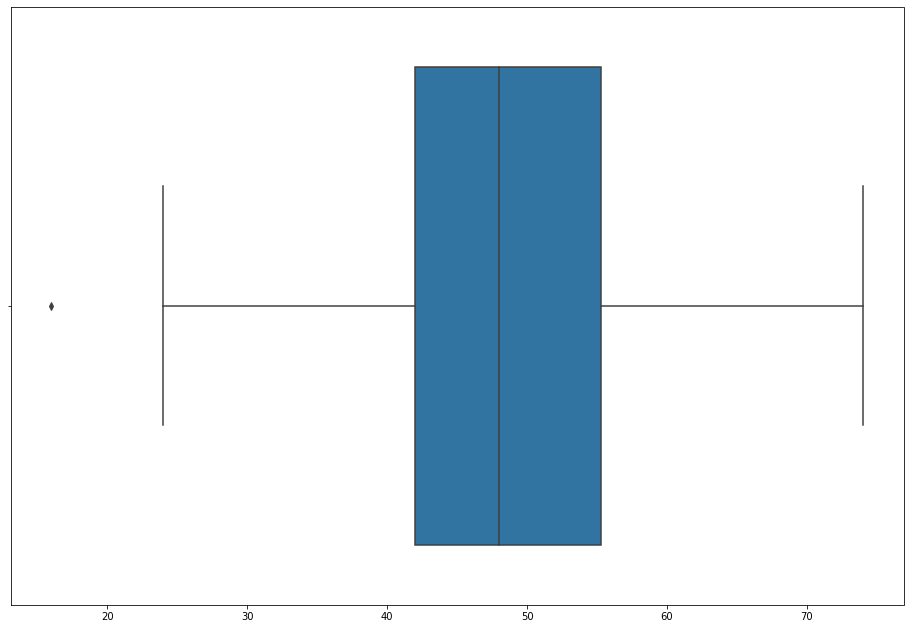

In [218]:
sns.boxplot(x=sample)

* How can we filter out the outliers?
* We could use the Series then describe it
* IQR is the range between 25% and 75%

In [219]:
ser = pd.Series(sample)

In [220]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

* Manual way to find the `lower_limit' for the outliner

In [221]:
IQR = 55.25 - 42.00
lower_limit = 42 - 1.5 * IQR

In [222]:
lower_limit

22.125

* Get rid of one person and that's totally legitimate

In [223]:
ser[ser > lower_limit]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

* Instead of calling the `describe`, you could use the `percentile`
* The percentile allows compute the q-th percentile of the data along the specified axis
* Suitable using in IQR
* Return back both 75% tile and 25% tile

In [224]:
q75, q25 = np.percentile(a= sample, q=[75,25])
IQR = q75 - q25

In [225]:
np.percentile(a= sample, q=[75])

array([55.25])

In [226]:
lower_limit = q25 - 1.5*IQR

In [227]:
lower_limit

22.125

* Another way to do this, which again is going to be more dependent on your actual domain knowledge => Visualization and take what you already know about the domain and affect it that way

In [228]:
df = pd.read_csv("../Course-2021/DATA/Ames_Housing_Data.csv")

* I wanna know the prediction for the sale price, given all these features

In [229]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


* Explore the features that highly correlated to label (SalePrice)

In [230]:
df.corr()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285
BsmtFin SF 1,-0.098375,-0.060075,0.215583,0.191555,0.284118,-0.050935,0.279870,0.151790,0.301872,1.000000,...,0.224010,0.124947,-0.100455,0.050541,0.095874,0.084140,0.092886,-0.001155,0.022397,0.432914


In [231]:
df.corr()["SalePrice"].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

* We could see several points that not suitable between the SalePrice and Overall Qual
* Those points are the outlier

<AxesSubplot:title={'center':'The relationship between the Overall Qual and SalePrice'}, xlabel='Overall Qual', ylabel='SalePrice'>

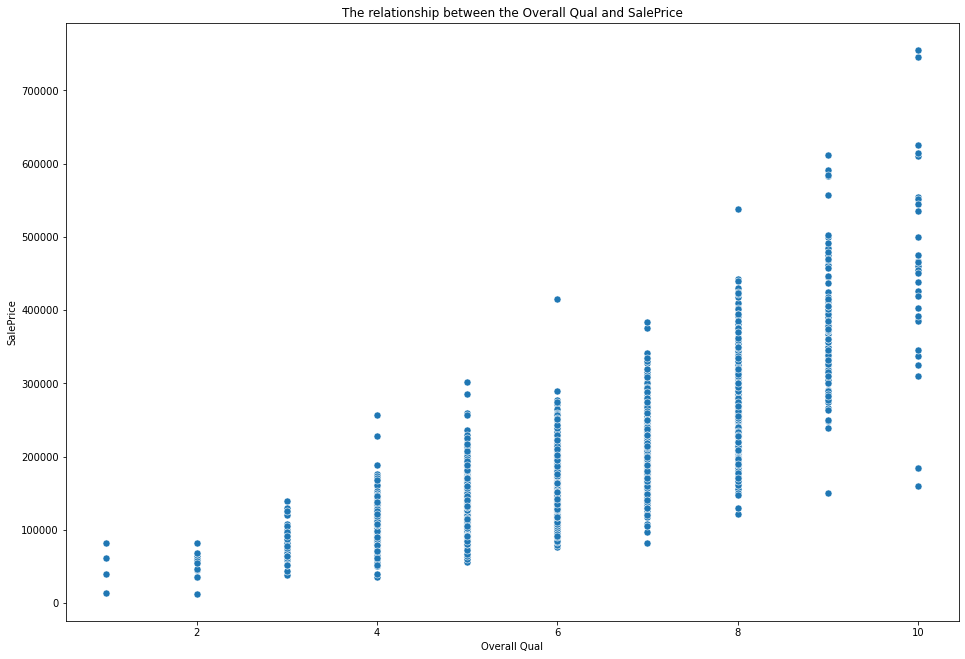

In [232]:
plt.title(label="The relationship between the Overall Qual and SalePrice")
sns.scatterplot(x="Overall Qual", y="SalePrice", data=df, s=50)

* Also see that some SalePrice of some houses are very low but the Gr Liv Area are really high

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

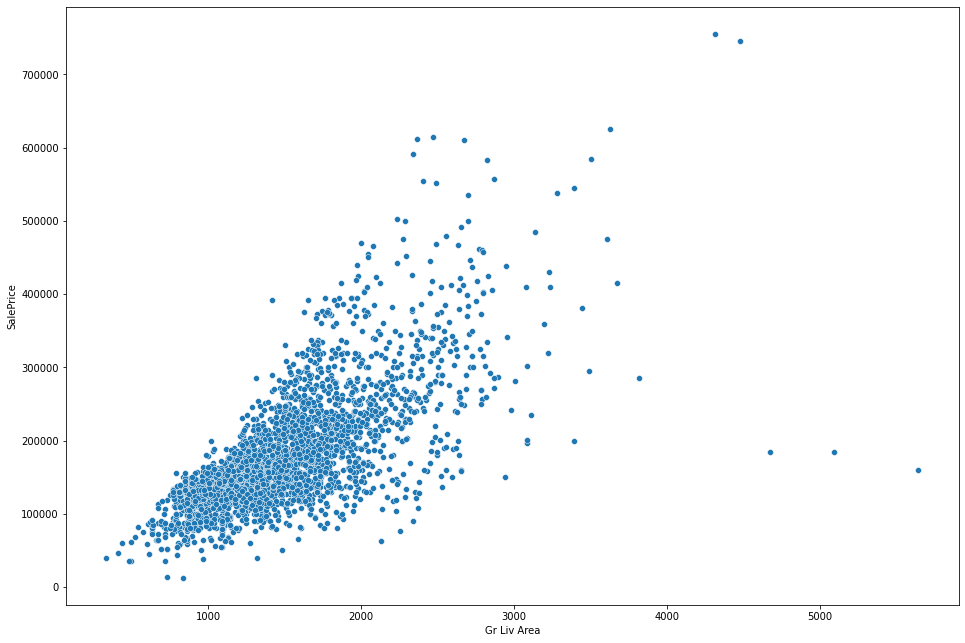

In [233]:
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=df)

* We have 4 rows that suitable with the filter
* These rows are not suitable or suitable to put into the data depend on the domain knowledge

In [234]:
df[(df["Overall Qual"]>8) & (df["SalePrice"]<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


* The similar filter with the Gr Liv Area
* 3 rows that sutable with the filter
* 3 rows below have appeared in the above filter
* Drop those rows as outliers

In [235]:
df[(df["Gr Liv Area"] > 4000) & (df["SalePrice"]<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [236]:
drop_index = df[(df["Gr Liv Area"] > 4000) & (df["SalePrice"]<400000)].index

In [237]:
df = df.drop(drop_index, axis=0)

In [238]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


* Repeat the plot
* The outlier points have been removed from the plot
* Easier to fit

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

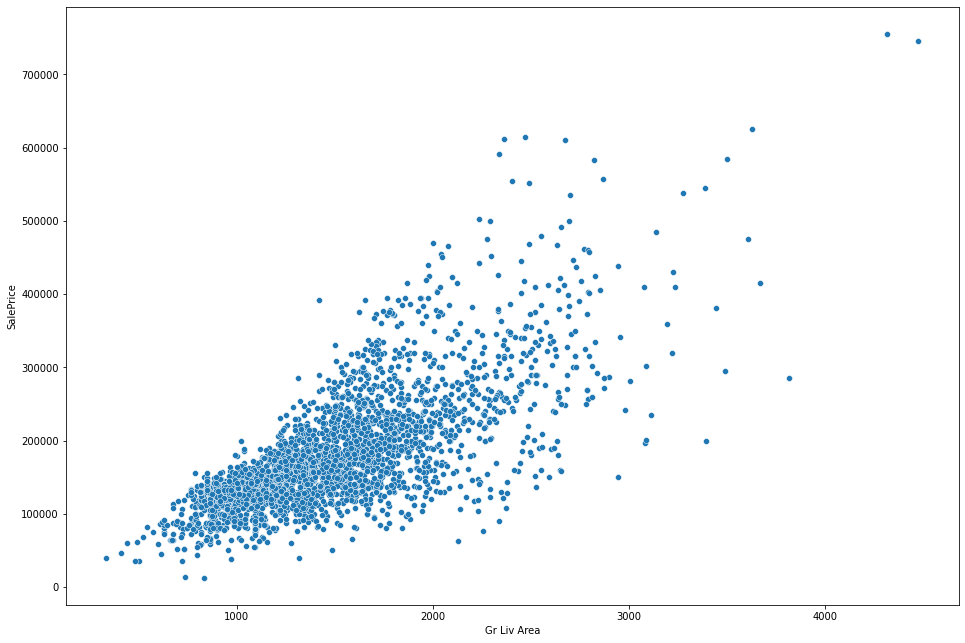

In [239]:
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=df)

Save the csv

In [240]:
df.to_csv('D:\Data Science\Course-2021\DATA\Ames_outliers_removed.csv')

# Dealing with Missing Data
### Part One: Evaluating what is missing
* Make sure you've viewed the "Missing Data" lecture in the pandas section **before** continuing with this series of lectures!
* Many concepts and methods referred to here were explained in those lectures.
* Working with the Ames data set, in Part one we will focus on evaluating just how much data is missing

In [241]:
with open("..\Course-2021\DATA\Ames_Housing_Feature_Description.txt", 'r') as f:
    print(f.read()) # also closing this file after read it

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [242]:
df = pd.read_csv(r"..\Course-2021\DATA\Ames_outliers_removed.csv")

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [244]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


* Drop the "PID" columns

In [245]:
df = df.drop("PID", axis=1)

In [246]:
len(df.columns)

80

* Count the isnull values
* Return 1 if True
* Return 0 if False

In [247]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

* Create a function that return back the percentage of missing data

In [248]:
100 * df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [249]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0 ].sort_values()
    return percent_nan

In [250]:
percent_nan = percent_missing(df)

* Return back only missing data
* Some of columns with a large of null values. Maybe those values are not NAN but 0 values
=> should look back into the data

In [251]:
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

* Make it into the barplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'Garage Area'),
  Text(2, 0, 'Total Bsmt SF'),
  Text(3, 0, 'Bsmt Unf SF'),
  Text(4, 0, 'BsmtFin SF 1'),
  Text(5, 0, 'BsmtFin SF 2'),
  Text(6, 0, 'Garage Cars'),
  Text(7, 0, 'Bsmt Full Bath'),
  Text(8, 0, 'Bsmt Half Bath'),
  Text(9, 0, 'Mas Vnr Area'),
  Text(10, 0, 'Mas Vnr Type'),
  Text(11, 0, 'BsmtFin Type 1'),
  Text(12, 0, 'Bsmt Qual'),
  Text(13, 0, 'Bsmt Cond'),
  Text(14, 0, 'BsmtFin Type 2'),
  Text(15, 0, 'Bsmt Exposure'),
  Text(16, 0, 'Garage Type'),
  Text(17, 0, 'Garage Finish'),
  Text(18, 0, 'Garage Qual'),
  Text(19, 0, 'Garage Cond'),
  Text(20, 0, 'Garage Yr Blt'),
  Text(21, 0, 'Lot Frontage'),
  Text(22, 0, 'Fireplace Qu'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'Misc Feature'),
  Text(26, 0, 'Pool QC')])

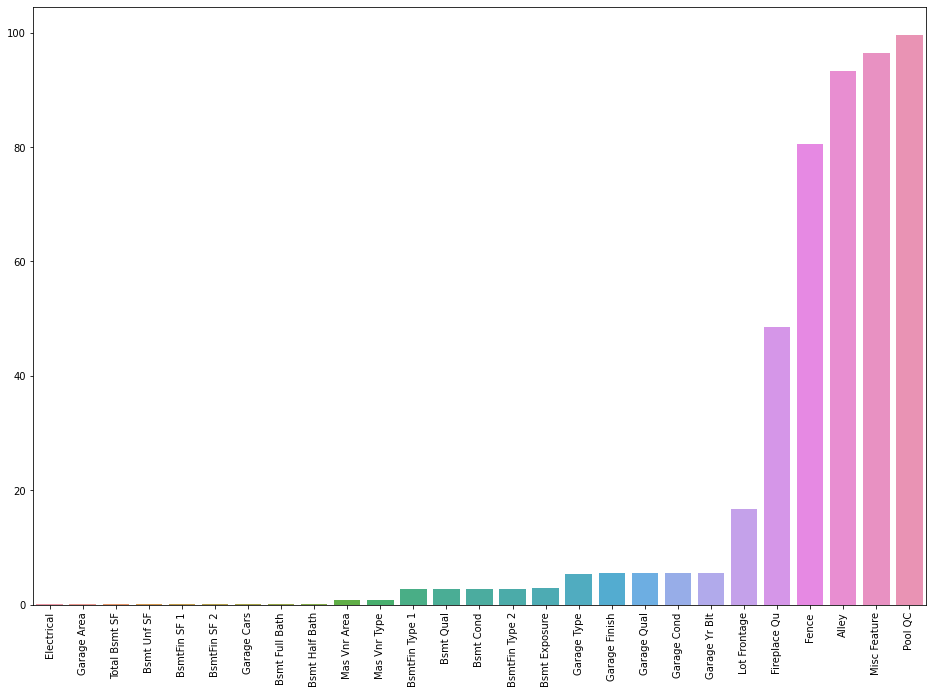

In [252]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation= 90)

# Part two: Filling data for rows
* Recall we just calculated percentage of data missing per feature column
* Let's first work on considering features that have a very small percent missing
* In the case of just a few rows missing the feature data, we'll consider either dropping these few rows or filling in with a reasonable assumption based off domain knowledge
* Let's jump to the notebook to explore our options!

* Consider the only one and two percent

(0.0, 1.0)

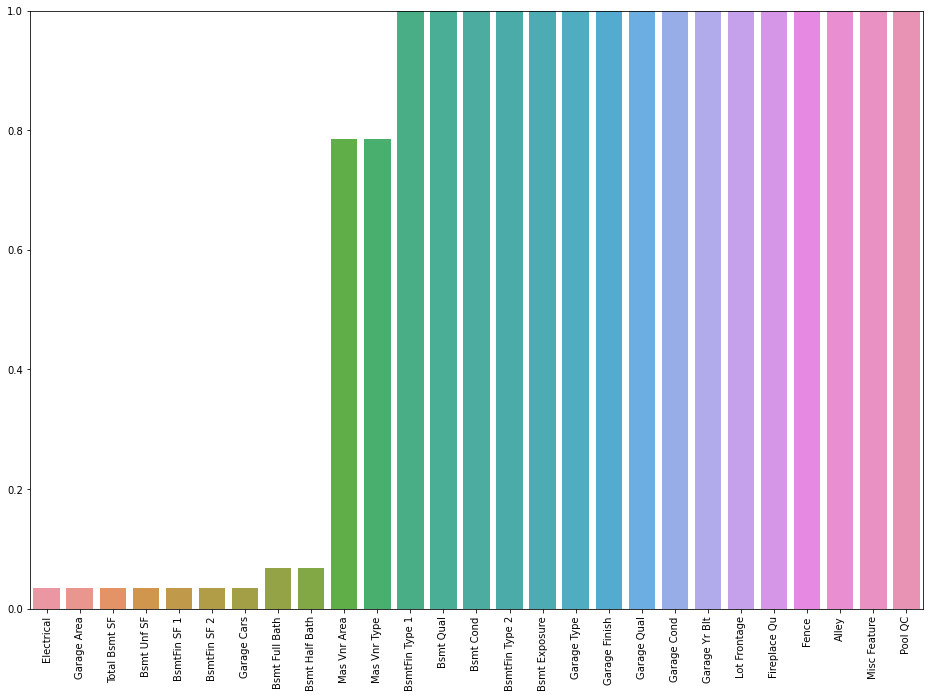

In [253]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation= 90)
plt.ylim(0,1)

In [254]:
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

* With the above information and percentage of 1 row in df, it could be seen that, only one or two rows has missing data in data aboves

In [255]:
100/len(df)

0.0341646737273659

* Analyze the null value of Electrical

In [256]:
df[df["Electrical"].isnull()]["Garage Area"]

1576    400.0
Name: Garage Area, dtype: float64

In [257]:
df[df["Bsmt Half Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


* Consider to drop the row => you should start from the least percent missing to higher percent missing
* Only looking for the rows where we are missing the value for electrical and Garage Cars

In [258]:
df = df.dropna(axis=0, subset=["Electrical", "Garage Cars"])

In [259]:
percent_nan = percent_missing(df)

* As you can see that you drop more than just one missing data

In [260]:
percent_nan[percent_nan < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

(0.0, 1.0)

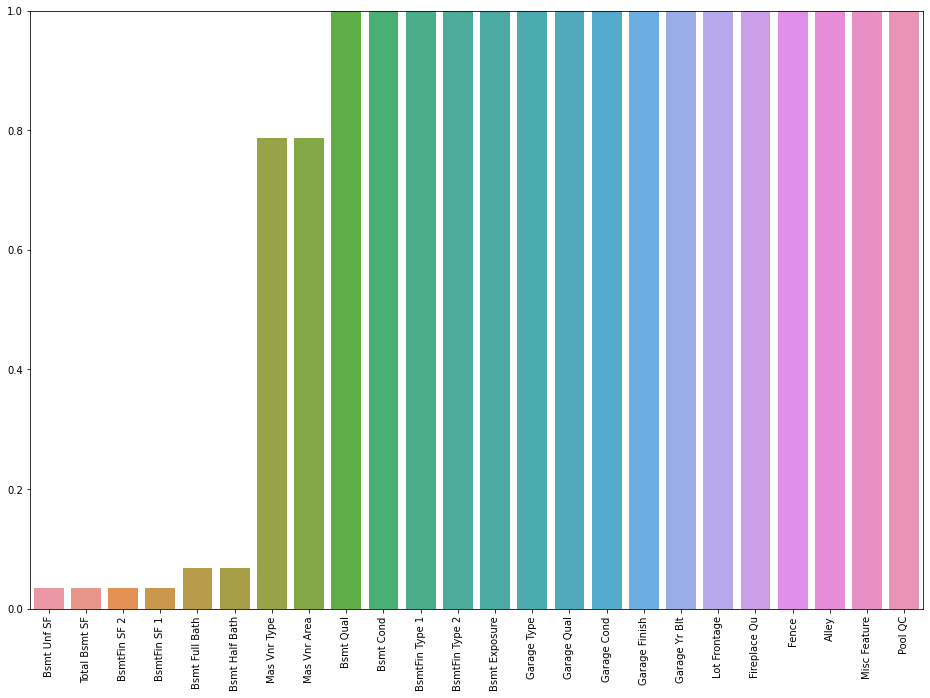

In [261]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation= 90)
plt.ylim(0,1)

In [262]:
df[df["Bsmt Half Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [263]:
df[df["Bsmt Full Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


* As you can see that two rows have the same problems.
* All of those houses basically have no basement => you could change the none value into the 0 or "None" in string

In [264]:
# BSMT Numeric columns --> fillna to 0
bsmt_num_cols = ["BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF", "Total Bsmt SF",
                 "Bsmt Full Bath","Bsmt Half Bath"]
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0) # fill with 0
# BSMT String columns
bsmt_str_cols = ["Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2"]
df[bsmt_str_cols] = df[bsmt_str_cols].fillna("None")

* Asking again about the null value

In [265]:
df[df["Bsmt Full Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [266]:
percent_nan = percent_missing(df)

(0.0, 1.0)

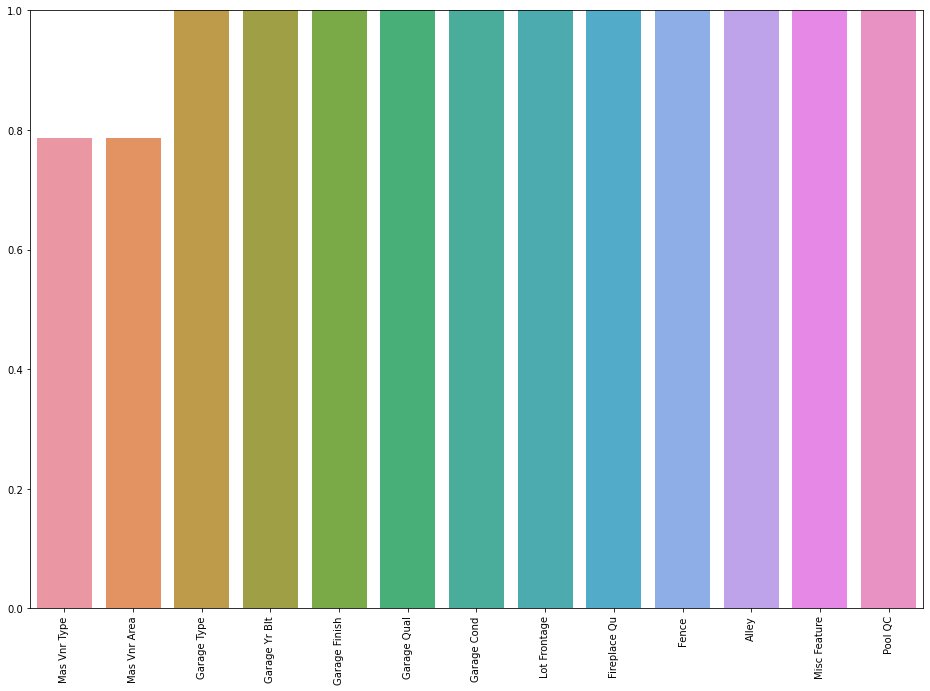

In [267]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation= 90)
plt.ylim(0,1)

* If the low value of missing => consider the row value
* If the high value of missing => consider the column value

In [268]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")

In [269]:
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [270]:
percent_nan = percent_missing(df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Garage Type'),
  Text(1, 0, 'Garage Yr Blt'),
  Text(2, 0, 'Garage Finish'),
  Text(3, 0, 'Garage Qual'),
  Text(4, 0, 'Garage Cond'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Fireplace Qu'),
  Text(7, 0, 'Fence'),
  Text(8, 0, 'Alley'),
  Text(9, 0, 'Misc Feature'),
  Text(10, 0, 'Pool QC')])

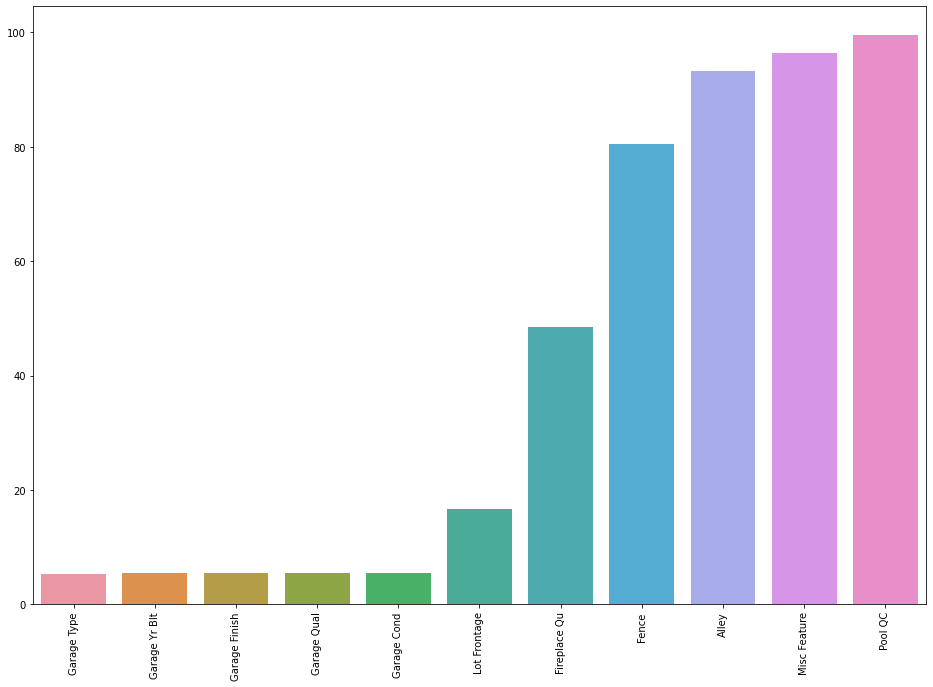

In [271]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation= 90)
# plt.ylim(0,1)

# Dealing with missing data - part three: Feature columns
* We are now dealing with missing data that goes beyond our 1% threshold
* In other words, more than 1% of rows are missing some of these feature values
* Two main approaches here:
    * Fill in the missing values
        * Potentially chaning ground truth in data
        * Must decide on reasonable estimation to filled value
        * Must apply transformation to all future data for predictions
        * Must save the transformation
        * Simplest case:
            * Replace all NaN values with a reasonable assumption (e.g. zero if assumed Nan implied zero)
        * Harder cases:
            * Must use statistical methods based on other columns to fill in NaN values (You must have the domain knowledge)
        * Statiscal estimation:
            * Dataset about people with some age data missing
            * Could use current carrer/education status to fill in data (e.g. people currently in college fill in with 20 years)
    * Drop the feature column (DON'T ACCTUALLY SEPARATE INTO Pros and Cons due to the side effects)
        * Very simple to do
        * No longer need to worry about feature in the future
            * If that feature later on in the future becomes very important for predictive ability, you unfortunately cannot then consider it into future because your model only consider the data that train on
        * Potential to lose a feature with possible important signal
        * Should consider drop feature approach when many rows are NaN
* Let's explore both approaches!
    * Important note !
        * Realistically on the Ames data set, many NaN values are probably actually correctly "zero". But we want to show the methodology for multiple approaches!

* Fill the "garage" columns

In [272]:
gar_str_cols = ["Garage Type", "Garage Finish", "Garage Qual", "Garage Cond"]

In [273]:
df[gar_str_cols] = df[gar_str_cols].fillna("None")

In [274]:
percent_nan = percent_missing(df)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Garage Yr Blt'),
  Text(1, 0, 'Lot Frontage'),
  Text(2, 0, 'Fireplace Qu'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'Alley'),
  Text(5, 0, 'Misc Feature'),
  Text(6, 0, 'Pool QC')])

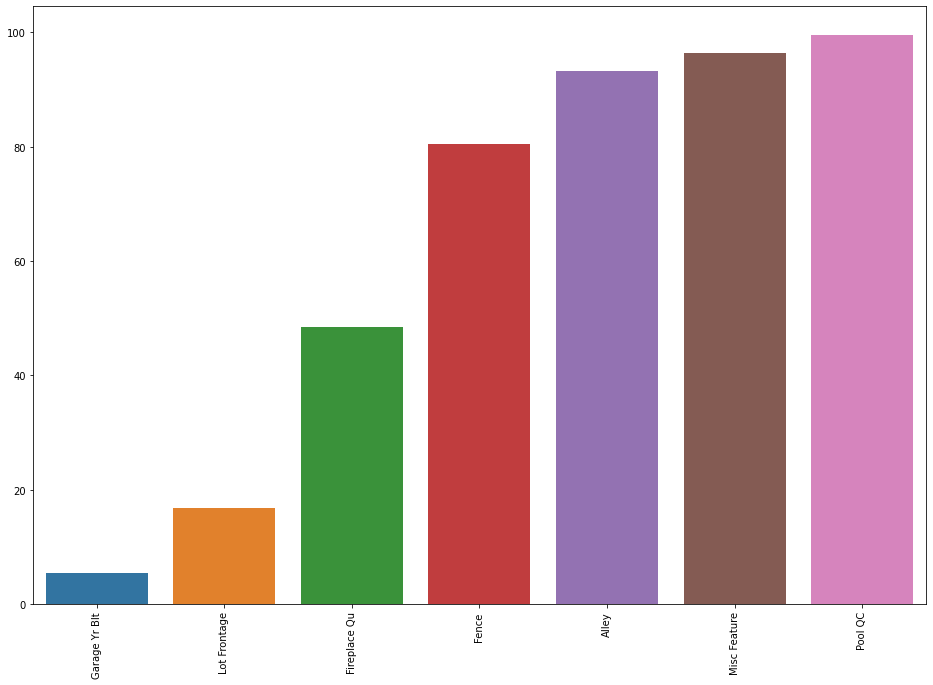

In [275]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation= 90)
# plt.ylim(0,1)

In [276]:
df["Garage Yr Blt"] = df["Garage Yr Blt"].fillna(0)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Garage Yr Blt'),
  Text(1, 0, 'Lot Frontage'),
  Text(2, 0, 'Fireplace Qu'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'Alley'),
  Text(5, 0, 'Misc Feature'),
  Text(6, 0, 'Pool QC')])

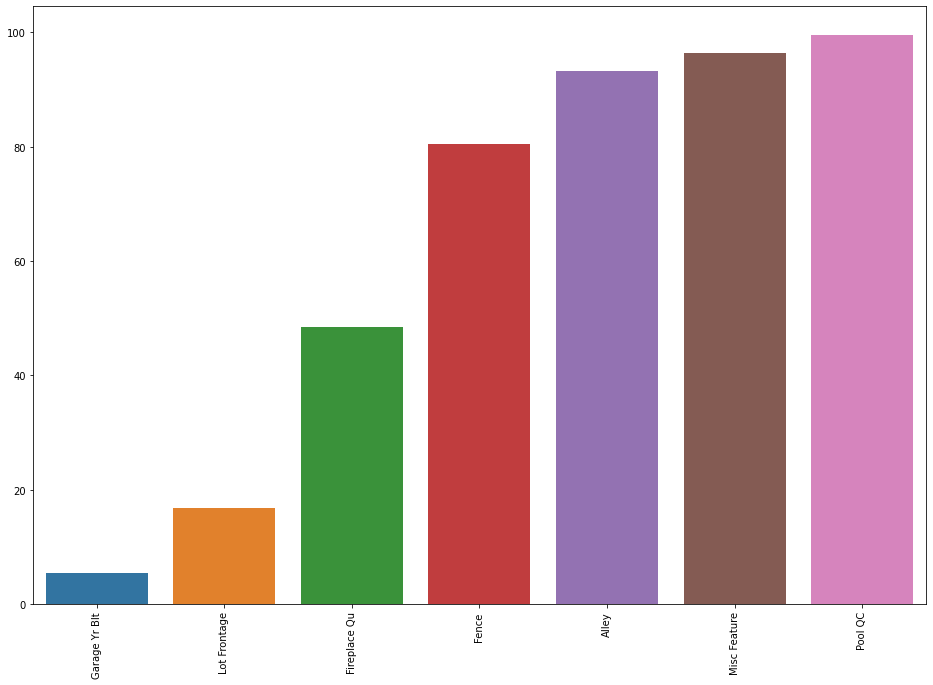

In [277]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation= 90)
# plt.ylim(0,1)

* Drop the columns with

In [278]:
df = df.drop(["Pool QC", "Misc Feature", "Alley", "Fence"], axis=1)

In [279]:
percent_nan = percent_missing(df)

* This is the trouble area where you could not drop the column or drop the row

(array([0, 1]), [Text(0, 0, 'Lot Frontage'), Text(1, 0, 'Fireplace Qu')])

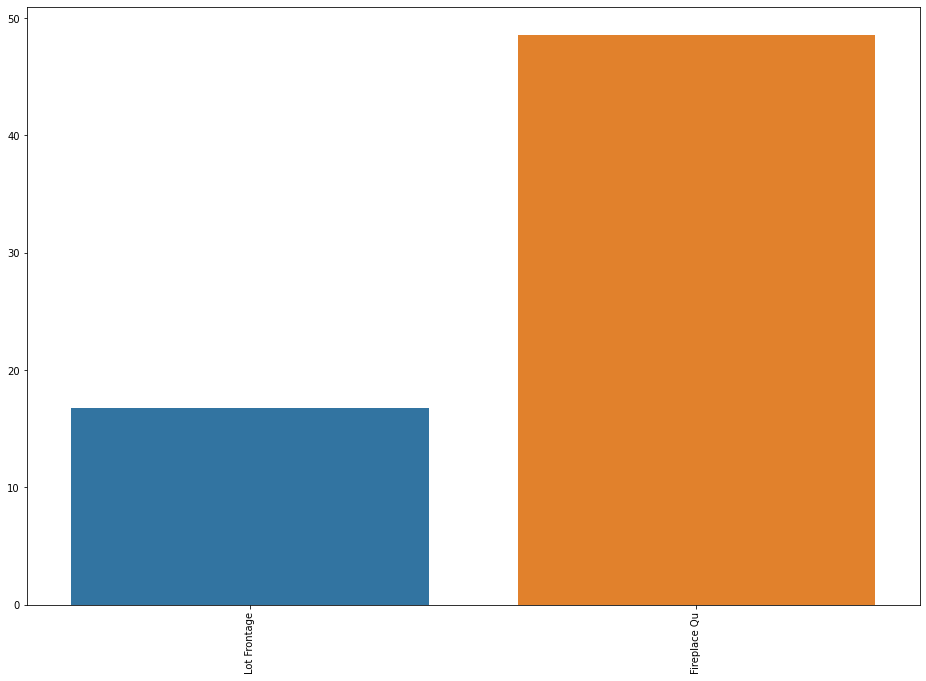

In [280]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation= 90)
# plt.ylim(0,1)

In [281]:
df["Fireplace Qu"].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

* Because the type of data is string
* Fill the Na with "None" value

In [282]:
df["Fireplace Qu"] = df["Fireplace Qu"].fillna("None")

* Because the type of data now is numeric


In [283]:
df["Lot Frontage"]

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2922     37.0
2923      NaN
2924     62.0
2925     77.0
2926     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

* Neighborhood: Physical locations within Ames city limits
* LotFrontage: Linear feet of street connected to property
* The Lotfrontage is going to depend on the neighborhood

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

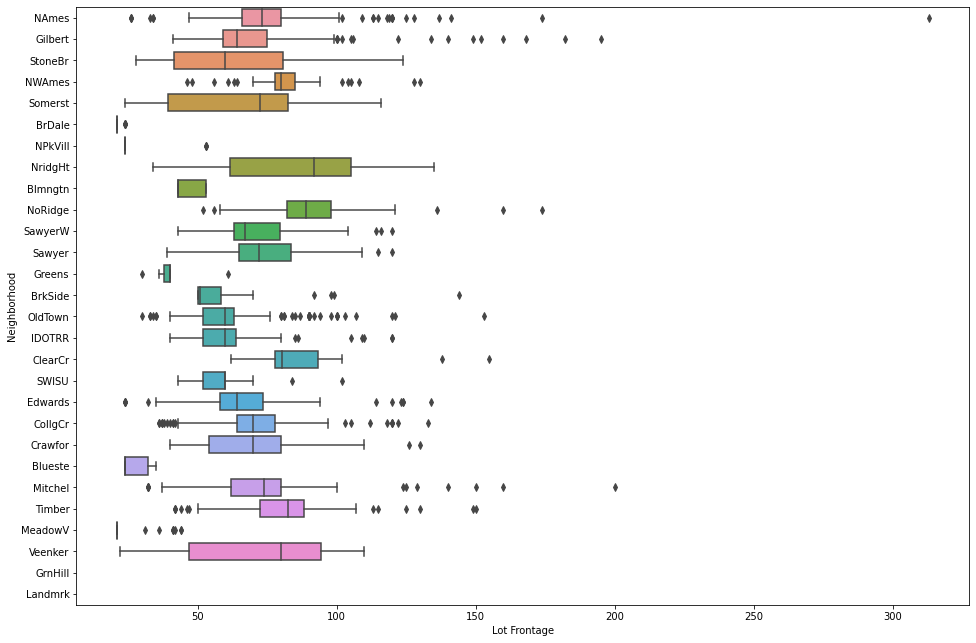

In [284]:
sns.boxplot(x="Lot Frontage", y="Neighborhood", data=df, orient="h")

* Replace the "Lot Frontage" value to the "Neighborhood" value

In [285]:
df.groupby("Neighborhood")["Lot Frontage"].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

* Using the `transform`
* The `transform` is similar as the `apply`
* Transform any missing value

In [286]:
df["Lot Frontage"] = df.groupby("Neighborhood")["Lot Frontage"].transform(func=lambda value: value.fillna(value.mean()))

In [287]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

* For the last Nan data, using the fillna

In [288]:
df["Lot Frontage"] = df["Lot Frontage"].fillna(0)

* Test for the NaN value by using the percent_nan = percent_missing(df)
* If error =>

In [290]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [289]:
percent_nan = percent_missing(df)

# Dealing with Categorical Data - Encoding Options
* We're going to jump straight to the transformation of the data, but make sure to have watched the section introduction lecture in full for detailed discussion on dummy variables and one hot encoding!

In [291]:
with open(r"..\Course-2021\DATA\Ames_Housing_Feature_Description.txt", "r") as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [292]:
df = pd.read_csv(r"..\Course-2021\DATA\Ames_NO_Missing_Data.csv")

In [293]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

* Choosing the MSSubClass
* Transfer it from numeric to string => get easily to create what known as dummy variable

In [295]:
df["MS SubClass"] = df["MS SubClass"].apply(str)

In [296]:
direction = pd.Series(["Up", "Up", "Down"])

In [297]:
direction

0      Up
1      Up
2    Down
dtype: object

* You can drop the Down columns due to the fact that not Up will Down

In [299]:
pd.get_dummies(direction, drop_first=True)

,Up
0,1
1,1
2,0


* How can I grab all the columns to consider for this?
* `df.select_dtypes(include="object"` => return all the data with type `object`
* All of MS SubClass values now are the string

In [300]:
df.select_dtypes(include="object")

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2921,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2922,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2923,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   object 
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2925 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Lot Shape        2925 non-null   object 
 6   Land Contour     2925 non-null   object 
 7   Utilities        2925 non-null   object 
 8   Lot Config       2925 non-null   object 
 9   Land Slope       2925 non-null   object 
 10  Neighborhood     2925 non-null   object 
 11  Condition 1      2925 non-null   object 
 12  Condition 2      2925 non-null   object 
 13  Bldg Type        2925 non-null   object 
 14  House Style      2925 non-null   object 
 15  Overall Qual     2925 non-null   int64  
 16  Overall Cond     2925 non-null   int64  
 17  Year Built    

* Separate into 2 specific types: string and numeric
* The reason split into two parts to transform `object` into `dummy variables` and reattach it back

In [303]:
my_object_df = df.select_dtypes(include="object")

In [304]:
my_numeric_df = df.select_dtypes(exclude="object")

* Transfer the object into the dummy variable

In [305]:
df_objects_dummies = pd.get_dummies(my_object_df, drop_first=True)

In [306]:
df_objects_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2921,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2923,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


* Concatenate between the `my_numeric_df` and `df_objects_dummies`

In [307]:
final_df = pd.concat([my_numeric_df, df_objects_dummies], axis=1)

In [308]:
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2921,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2922,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2923,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0


In [309]:
final_df.corr()["SalePrice"].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64

* The `Overall Qual` becomes our problem because it is a measurement of human, which means any future house that comes on the market you're not just going to be able to plug in all actual quantitative values.=> Need someone to give it an overall quality of value off that